In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from glob import glob
import math
from datetime import datetime

import numpy as np
import pandas as pd

In [2]:
root_dir = "../resources/nfl-big-data-bowl-2024/"

In [3]:
games_df = pd.read_csv(root_dir + "games.csv")
players_df = pd.read_csv(root_dir + "players.csv")
plays_df = pd.read_csv(root_dir + "plays.csv")
tackles_df = pd.read_csv(root_dir + "tackles.csv")

In [4]:
tracking_files = []
# tracking data
for i, tracking_filename in enumerate(glob(root_dir + "tracking*.csv")):
  file = pd.read_csv(tracking_filename)
  tracking_files.append(file)
tracking_df = pd.concat(tracking_files, ignore_index=True)

In [5]:
games_df.head(5)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [6]:
players_df.head(5)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [7]:
players_df["weight"].unique()

array([225, 328, 267, 217, 245, 315, 175, 300, 222, 220, 229, 215, 320,
       304, 265, 275, 185, 195, 254, 325, 285, 335, 330, 250, 210, 203,
       288, 257, 287, 295, 192, 270, 199, 235, 260, 207, 202, 310, 305,
       247, 214, 242, 233, 279, 248, 243, 352, 308, 321, 198, 200, 212,
       174, 317, 311, 238, 190, 221, 193, 340, 255, 211, 179, 327, 205,
       307, 281, 240, 263, 197, 230, 191, 309, 178, 269, 231, 280, 194,
       312, 183, 252, 196, 336, 301, 350, 322, 256, 290, 332, 232, 306,
       224, 302, 216, 316, 292, 313, 218, 338, 341, 182, 236, 318, 177,
       272, 227, 323, 298, 380, 234, 184, 209, 180, 208, 188, 299, 223,
       237, 228, 314, 244, 201, 246, 296, 303, 261, 291, 324, 347, 189,
       294, 213, 259, 181, 253, 289, 264, 266, 204, 284, 297, 226, 173,
       258, 345, 329, 251, 206, 277, 331, 344, 187, 219, 239, 262, 342,
       249, 170, 176, 326, 366, 334, 319, 241, 268, 172, 333, 186, 153,
       165, 273, 278, 346, 274, 293, 355, 282, 360, 379])

In [8]:
plays_df.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [9]:
tackles_df[tackles_df["assist"] == 1].head(50)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
9919,2022090800,2163,42816,0,1,0,0
9920,2022091100,1170,53469,0,1,0,0
9921,2022091100,1587,46083,0,1,0,0
9922,2022091100,2491,53469,0,1,0,0
9923,2022091100,3148,52542,0,1,0,0
9924,2022091100,3334,38607,0,1,0,0
9925,2022091101,158,45004,0,1,0,0
9926,2022091101,1901,43441,0,1,0,0
9927,2022091101,2365,45004,0,1,0,0
9928,2022091101,2365,52446,0,1,0,0


In [10]:
tracking_df.head(5)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022100600,90,33084.0,Matt Ryan,1,2022-10-06 20:17:04.799999,2.0,IND,left,90.42,23.74,0.11,0.04,0.03,271.98,257.76,NaN
1,2022100600,90,33084.0,Matt Ryan,2,2022-10-06 20:17:04.900000,2.0,IND,left,90.39,23.74,0.14,0.06,0.03,272.84,256.68,NaN
2,2022100600,90,33084.0,Matt Ryan,3,2022-10-06 20:17:05.000000,2.0,IND,left,90.36,23.73,0.17,0.09,0.03,272.84,254.91,NaN
3,2022100600,90,33084.0,Matt Ryan,4,2022-10-06 20:17:05.099999,2.0,IND,left,90.32,23.73,0.19,0.11,0.04,275.80,260.06,NaN
4,2022100600,90,33084.0,Matt Ryan,5,2022-10-06 20:17:05.200000,2.0,IND,left,90.28,23.72,0.20,0.13,0.04,275.80,257.79,NaN


In [11]:
print(tracking_df[(tracking_df.gameId == 2022090800)]["event"].unique())

[nan 'pass_arrived' 'pass_outcome_caught' 'tackle' 'run' 'first_contact'
 'ball_snap' 'handoff' 'touchdown' 'out_of_bounds' 'man_in_motion'
 'fumble' 'play_action' 'pass_forward' 'lateral' 'autoevent_passforward'
 'autoevent_passinterrupted' 'line_set']


In [12]:
print(tracking_df[(tracking_df.gameId == 2022090800)]["frameId"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81]


In [13]:
print(tracking_df[(tracking_df.gameId == 2022090800)]["event"])

8223164             NaN
8223165    pass_arrived
8223166             NaN
8223167             NaN
8223168             NaN
               ...     
8302371          tackle
8302372             NaN
8302373             NaN
8302374             NaN
8302375             NaN
Name: event, Length: 79212, dtype: object


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


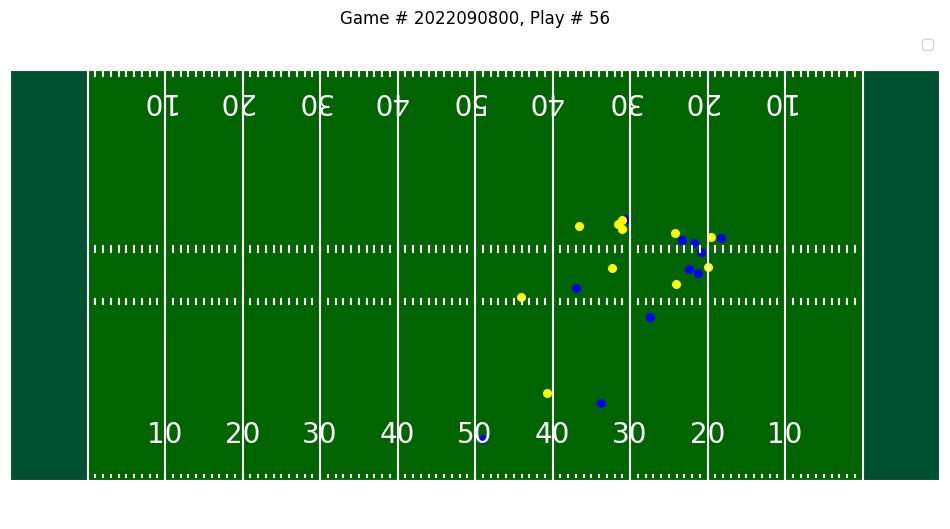

In [15]:
import matplotlib.pyplot as plt
from src.utils import create_football_field
%matplotlib inline
fig, ax =create_football_field()

tracking_df.query("gameId == 2022090800 and playId == 56 and frameId == 22 and club == 'BUF'").plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=30, legend='Away')
tracking_df.query("gameId == 2022090800 and playId == 56 and frameId == 22 and club == 'LA'").plot(x='x', y='y', kind='scatter', ax=ax, color='yellow', s=30, legend='Home')
plt.title('Game # 2022090800, Play # 56')
plt.legend()
plt.show()

In [16]:
print(len(tracking_df.groupby(["gameId", "playId"])))


12486


In [16]:
filt_df = tracking_df[(tracking_df["event"] == "tackle") & (tracking_df["frameId"] > 60) & (tracking_df["frameId"] < 70)]["frameId"]
print(filt_df.values.min())
print(filt_df.values.max())

61
69


In [18]:
tracking_df.drop(tracking_df[tracking_df["displayName"] == "football"].index, inplace=True)
num_filt = 0
to_save = tracking_df.groupby(["gameId", "playId"])
to_save[(60 > len(to_save["frameId"].unique())) & (len(to_save["frameId"].unique()) > 70)]
print(len(to_save))

KeyError: 'Column not found: False'

In [14]:
frame_max, frame_min = -1, 100000
frame_data = []

tracking_df.drop(tracking_df[tracking_df["displayName"] == "football"].index, inplace=True)
num_filt = 0
for i, (gameId, grouped_game) in enumerate(tracking_df.groupby(["gameId", "playId"])):
    current_frames = []
    if "tackle" not in grouped_game["event"].values:
         continue
    if 60 > len(grouped_game["frameId"].unique()) > 70:
           continue
    
    frame_max = max(frame_max, len(grouped_game["frameId"].unique()))
    frame_min = min(frame_min, len(grouped_game["frameId"].unique()))
    num_filt += 1
    
    frames = grouped_game["frameId"].unique()
    for frame in frames:
        current_frames.append(
             grouped_game[grouped_game.frameId == frame]
             )
    
    frame_data.append(current_frames)
    if len(frame_data) > 10:
         break
     
print(num_filt)

11


In [7]:
import random
random.shuffle(frame_data)

In [8]:
train_size = int(len(frame_data) * 0.75)
val_size = int((len(frame_data) - train_size) * 0.5)
test_size = int((len(frame_data) - train_size) * 0.5) + 1

In [9]:
print(train_size, val_size, test_size)

7530 1255 1256


In [15]:
from tqdm import tqdm
train = pd.DataFrame()
pbar = tqdm(total=train_size) 
for frames in frame_data[:train_size]:
    pbar.update(1)
    inter = pd.concat(frames, axis=0)
    train = pd.concat((train, inter), axis=0)
pbar.close()

100%|██████████| 7530/7530 [45:54<00:00,  2.73it/s]   


In [16]:
train.to_csv("train.csv")

In [ ]:
print(len(train))

In [57]:
print(frame_max, frame_min)

56 16


In [16]:
print(f"Batches: {len(frame_data)}")
print(f"Number of frames: {len(frames)}")
print(f"First frame number of nodes: {len(frame_data[0])}")

# (frames, num_nodes, num_features)
data = None
player_attributes = players_df.set_index("nflId")
max_weight = player_attributes["weight"].values.max()
min_weight = player_attributes["weight"].values.min()
for lst_of_frames in frame_data:
    seq_list = None
    for frames in lst_of_frames:
        event, *_ = frames["event"].unique()
        if str(event) == "tackle":
            toa= pd.to_datetime(frames['time'], format='%Y-%m-%d %H:%M:%S.%f').unique()
    mean_speed, std_speed = lst_of_frames[0][["s"]].mean(), lst_of_frames[0][["s"]].std()
    mean_acc, std_acc = lst_of_frames[0][["a"]].mean(), lst_of_frames[0][["a"]].std()

    start_time = pd.to_datetime(lst_of_frames[0]['time'], format='%Y-%m-%d %H:%M:%S.%f').unique()
    total_time_of_play = (pd.to_datetime(
        lst_of_frames[-1]['time'], format='%Y-%m-%d %H:%M:%S.%f').unique() - start_time).total_seconds()
    for frames in lst_of_frames:
        frame = frames.sort_values(by=["nflId"])
        merged_games = pd.merge(games_df, frame, left_on='gameId', right_on='gameId')
        merged_plays = pd.merge(plays_df, frame, left_on=['gameId','playId'], right_on=['gameId','playId'])
        merged_tackles = pd.merge(
            tackles_df, 
            frame, 
            left_on=['gameId','playId'], 
            right_on=['gameId','playId'],
            suffixes=["_tackler", None]
        )
        # Temporal data takes into account position, velocity, acceleration
        # distance traveled, orientation, angle of player motion,
        # whether player on home team, has possession, is ball carrier, is involved in tackle play
        x_vals, y_vals = frame[["x"]].values / 120, frame[["y"]].values / 53.3
        s_vals = (frame[["s"]] - mean_speed)/std_speed
        a_vals = (frame[["a"]] - mean_acc)/std_acc
        dis_vals= frame[["dis"]].values
        o_vals, dir_vals = frame[["o"]].values / 360, frame[["dir"]].values / 360
        weight_vals = ((
            player_attributes.loc[frame["nflId"]]["weight"].values - min_weight) / (max_weight - min_weight))[..., np.newaxis]
        collect_time = pd.to_datetime(frame['time'], format='%Y-%m-%d %H:%M:%S.%f').apply(
            lambda x: float(((x - start_time)/total_time_of_play).total_seconds()[0])
        ).values[..., np.newaxis]

        is_home = np.where(merged_games["homeTeamAbbr"].values  == merged_games["club"].values, 1, 0)[..., np.newaxis]
        is_in_possesion = np.where(merged_plays["possessionTeam"].values  == merged_plays["club"].values, 1, 0)[..., np.newaxis]
        is_ball_carrier = np.where(merged_plays["nflId"].values  == merged_plays["ballCarrierId"].values, 1, 0)[..., np.newaxis]
        
        # Labels include event_type
        is_tackle_play = frame[["event"]].isin(["tackle"])
        is_fumble_play = frame[["event"]].isin(["fumble"])
        is_first_contact_play = frame[["event"]].isin(["first_contact"])
        is_involved = np.isin(frame[["nflId"]].values, merged_tackles["nflId_tackler"].unique())

        time_to_attack = pd.to_datetime(frame['time'], format='%Y-%m-%d %H:%M:%S.%f').apply(
            lambda x: float((toa - x).total_seconds()[0])
        ).values[..., np.newaxis]
        current = np.concatenate(
            [x_vals, y_vals, s_vals, a_vals, dis_vals, o_vals, dir_vals, weight_vals, collect_time, #numerical
             is_in_possesion, is_ball_carrier,  #categorical
             is_first_contact_play, is_tackle_play, is_fumble_play, is_involved, time_to_attack, is_home,], #labels
            axis=1
            )[np.newaxis, ...]
        # Generate sequences of frames (len_input_seq)
        seq_list = np.concatenate((seq_list, current), axis=0) if seq_list is not None else current
    # Batch sequences of frames (batch_size)
    data = np.concatenate((data, seq_list), axis=0) if data is not None else seq_list[np.newaxis, ...]
    break

Batches: 11
Number of frames: 56
First frame number of nodes: 22


In [104]:
print((toa-start_time).total_seconds())

[1.7]


In [17]:
print(data.shape)

(1, 22, 22, 17)


In [ ]:
import numpy as np
res = np.pad(data, (2, 3), 'constant', constant_values=(4, 6))

In [24]:
print(data[0][0])

[[ 0.49883333  0.5217636  -0.70152939 -0.63164529  0.          0.76458333
   0.60644444  0.75770925  0.          1.          0.          0.
   0.          0.          0.          0.          5.1       ]
 [ 0.44808333  0.52645403 -0.20595358 -0.39342478  0.01        0.33502778
   0.42133333  0.39207048  0.          0.          0.          1.
   0.          0.          0.          1.          5.1       ]
 [ 0.48325     0.50300188 -0.63073285 -0.59194187  0.01        0.14136111
   0.14661111  0.55947137  0.          0.          0.          1.
   0.          0.          0.          0.          5.1       ]
 [ 0.49575     0.55309568 -0.70152939 -0.63164529  0.          0.73119444
   0.72969444  0.66960352  0.          1.          0.          0.
   0.          0.          0.          0.          5.1       ]
 [ 0.50816667  0.44446529 -0.70152939 -0.63164529  0.          0.78561111
   0.35363889  0.10572687  0.          1.          0.          0.
   0.          0.          0.          0.       

In [19]:
for lst_of_frames in frame_data:
    events = set()
    for frame in lst_of_frames:
        lst = set(np.unique(frame["event"].values).tolist())
        events.add(str(lst.pop()))
    print(events)

{'tackle', 'nan', 'pass_outcome_caught', 'pass_arrived'}
{'first_contact', 'nan', 'run', 'tackle'}
{'ball_snap', 'first_contact', 'handoff', 'tackle', 'nan'}
{'first_contact', 'tackle', 'pass_arrived', 'nan', 'pass_outcome_caught'}
{'ball_snap', 'first_contact', 'handoff', 'tackle', 'nan'}
{'first_contact', 'tackle', 'pass_arrived', 'nan', 'pass_outcome_caught'}
{'ball_snap', 'first_contact', 'handoff', 'tackle', 'nan'}
{'first_contact', 'tackle', 'pass_arrived', 'nan', 'pass_outcome_caught'}
{'ball_snap', 'first_contact', 'handoff', 'tackle', 'nan'}
{'ball_snap', 'nan', 'handoff', 'tackle'}
{'ball_snap', 'first_contact', 'handoff', 'tackle', 'nan'}


In [65]:
print(data[0][0][0])

[ 0.73641667  0.51163227 -0.64372306 -0.93664234  0.16        0.64372222
  0.41083333  0.75770925  0.          1.          0.          0.
  0.          0.          0.          0.          1.7       ]


In [16]:
import nfl_data_py as nfl
nfl.see_pbp_cols()

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'out_of_bounds', 'home_opening_kickoff', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd',
       'xpass', 'pass_oe'],
      dtype='object', length=372)

In [68]:
def influence(player1: np.ndarray, player2: np.ndarray):
    """
    Compute the influence from one player1 to player2.
    The influence is computed by the l2 norm of
      position, velocity and acceleration
    """
    NORM = math.sqrt((player1[0]-player2[0])**2+ (player1[1]-player2[1])**2)
    if NORM ==0:
        return 0
    return 1/(NORM)
    

In [18]:
print(data[0][0].shape)

(22, 17)


In [69]:
adj = []
cmap = []
for elements in data[0][0]:
    current_element = []
    for other_elements in data[0][0]:
        is_not_same_team = elements[-1] != other_elements[-1]
        print(is_not_same_team)
        if is_not_same_team:
            current_element.append(influence(elements, other_elements))
        else:
            current_element.append(0)
    if elements[-1]:
        cmap.append('b')
    else:
        cmap.append('g')
    adj.append(current_element)

False
True
True
False
False
True
True
True
True
False
False
False
True
False
False
True
True
False
False
True
False
True
True
False
False
True
True
False
False
False
False
True
True
True
False
True
True
False
False
True
True
False
True
False
True
False
False
True
True
False
False
False
False
True
True
True
False
True
True
False
False
True
True
False
True
False
False
True
True
False
False
True
True
True
True
False
False
False
True
False
False
True
True
False
False
True
False
True
False
True
True
False
False
True
True
True
True
False
False
False
True
False
False
True
True
False
False
True
False
True
True
False
False
True
True
False
False
False
False
True
True
True
False
True
True
False
False
True
True
False
True
False
True
False
False
True
True
False
False
False
False
True
True
True
False
True
True
False
False
True
True
False
True
False
True
False
False
True
True
False
False
False
False
True
True
True
False
True
True
False
False
True
True
False
True
False
True
False
False
True
True
False

[[  1.          11.83792067  11.8343753    0.           0.
    2.57219168   3.73229085   7.94855223  29.59345727   0.
    0.           0.           7.12630615   0.           0.
   40.32220947   4.29398655   0.           0.           3.82249981
    0.           6.42824279]
 [ 11.83792067   1.           0.          11.5780677    4.93038772
    0.           0.           0.           0.          10.15039045
    5.81503692   8.76530581   0.           9.61905664  11.67925445
    0.           0.           7.616654     2.60464388   0.
    6.506161     0.        ]
 [ 11.8343753    0.           1.          17.01137448   6.5464009
    0.           0.           0.           0.           9.11628895
    3.63027425  33.17358985   0.           7.058258     8.23569729
    0.           0.          88.00470177   2.08419605   0.
   36.66911296   0.        ]
 [  0.          11.5780677   17.01137448   1.           0.
    2.41277014   4.1382354   10.04389514  16.28953903   0.
    0.           0.           6.

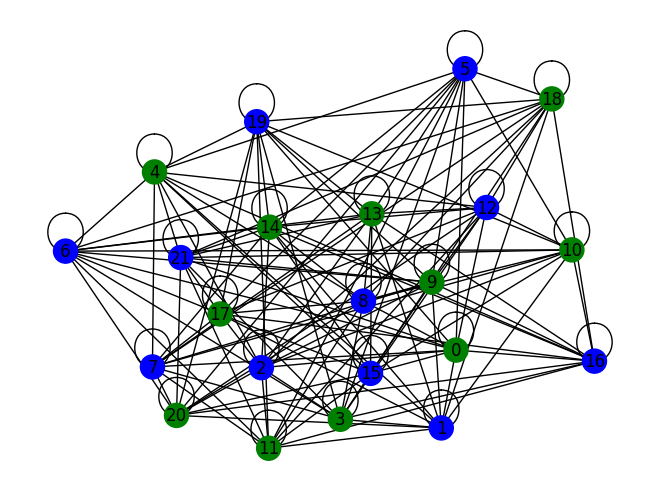

In [70]:
import networkx as nx
A=np.matrix(adj) + np.identity(len(adj))
print(A)
G = nx.Graph(np.array(A))
A = nx.normalized_laplacian_matrix(G).toarray()

nx.draw(G, node_color=cmap, with_labels=True)